In [1]:
%matplotlib inline
import numpy as np
from plantcv import plantcv as pcv
from matplotlib import pyplot as plt

In [2]:
pcv.params.debug = "plot"
pcv.params.text_size = 5
pcv.params.text_thickness = 10
pcv.params.line_thickness = 10

In [3]:
def plot_color_channels(img):
    # List of colormaps
    colors = ["Blues", "Greens", "Reds"]
    # Create a new figure with 3 subplots
    figure, plots = plt.subplots(ncols=3, nrows=1, constrained_layout=True)
    # iterate over each subplot
    for i, subplot in zip(range(3), plots):
        # Plot the ith image color channel with the ith colormap
        subplot.imshow(img[:, :, i], cmap=colors[i])
        # Turn off the coordinates
        subplot.set_axis_off()
    # Show the image
    plt.show()

## Help:
- PlantCV - https://plantcv.readthedocs.io/en/stable/
- NumPy - https://numpy.org/doc/stable/

# What is an image?
We will open an image and explore the components of it.

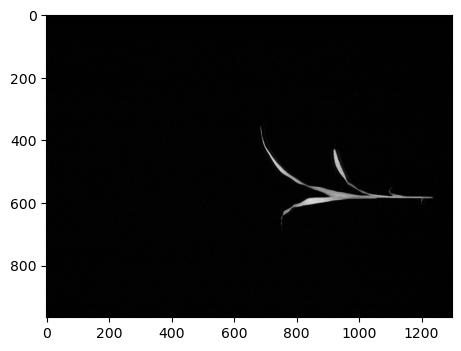

In [4]:
# Read in the image fmax.png
gray_img, graypath, grayname = pcv.readimage(filename="images/fmax.png")

In [5]:
# Print the content of the image variable
print(gray_img)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0 240   0 ...   0   0   0]
 [  0  90   0 ... 111   0   0]
 [  0  22 134 ... 284   0 136]]


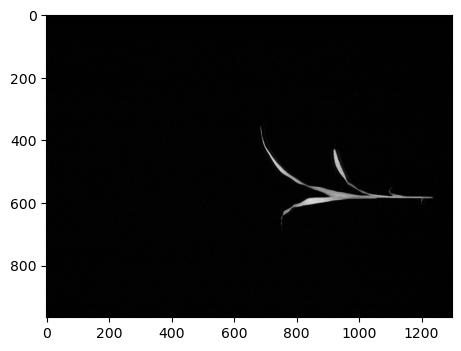

In [6]:
# Visualize the image 
pcv.plot_image(img=gray_img)

In [7]:
# Show what is in the second and third outputs from pcv.readimage
print(graypath)
print(grayname)

images
fmax.png


# What are some things we notice about the image?

* The image is composed of small elements (pixels) arranged in a square grid
* Each pixel is given by its coordinates and one intensity value
* The pixel coordinate system origin is in the top left
* The coordinate system is left-handed, coordinate values increase down and right
* The image is composed of gray values (no color)

![2D gird](./figures/grid2D.png)

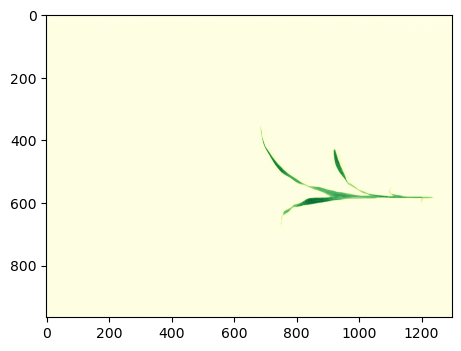

In [8]:
# Plot the image using a different colormap, some options: 'YlGn', 'viridis', 'magma', 'Oranges', 'RdPu'
pcv.plot_image(img=gray_img, cmap='YlGn')

# How are images represented in Python?

In [9]:
# Use the Python type function to determine the data type of the image
type(gray_img)

numpy.ndarray

# Most common Python image analysis packages store images as NumPy arrays
[NumPy](https://numpy.org/) is a core package of the scientific Python community.

We can use NumPy to determine the shape and size of the image. The dimensions are in the order y (rows), x (columns), z (channels) for images.

We can also determine what type of data is stored in each pixel (dtype).

In [10]:
# Print the image data
gray_img

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0, 240,   0, ...,   0,   0,   0],
       [  0,  90,   0, ..., 111,   0,   0],
       [  0,  22, 134, ..., 284,   0, 136]], dtype=uint16)

In [11]:
# Determine the shape and size of the image
gray_img.shape

(966, 1296)

In [12]:
# Determine the data type of the image
gray_img.dtype

dtype('uint16')

# Common image data types

The data type tells how the pixel values are encoded and how many bits they require. 

It is usefull because it determines the range of values a pixel can take. 

Unsigned integers (uint) are commonly used:
- uint8 = 8-bit (2^8 = 256 possible values. Darkest value = 0, brightest = 255)
- uint16 = 16-bit (2^16 = 65,536 possible values. Darkest value = 0, brightest = 65,535)

In [13]:
# Calculate the minimum value observed in gray_img
np.min(gray_img)

0

In [14]:
# Calculate the maximum value observed in gray_img
np.max(gray_img)

7084

# Indexing and slicing
Help us to select portions of an array.


In [15]:
# Show the value of the pixel in row 580 and column 940 
gray_img[580,940]

3935

The basic slice syntax is _i:j_ where _i_ is the starting index and _j_ is the stopping index

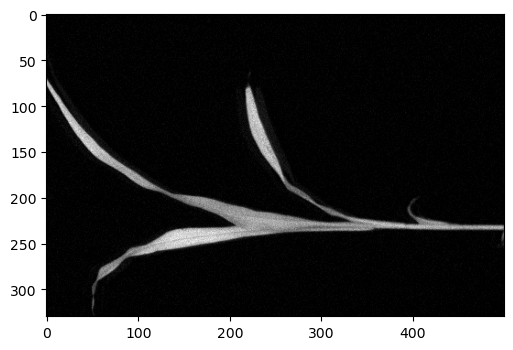

In [16]:
# Create a new image by cropping around the plant part and display it
gray_img_crop = gray_img[350:680,700:1200]
pcv.plot_image(gray_img_crop)

* If _i_ is not given it defaults to 0. 
* If _j_ is not given it defaults to the last value.
* : means select all indices along this axis.

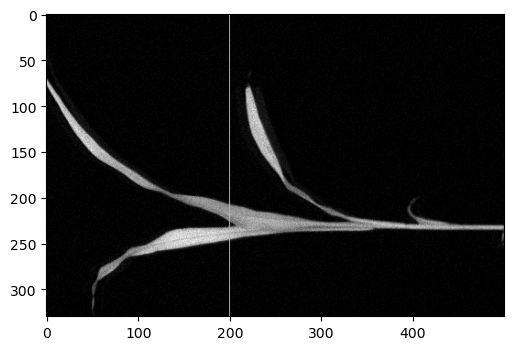

In [17]:
# Change the pixels in a full column of the cropped image to an arbitrary value
gray_img_crop[:,200] = 5000
pcv.plot_image(gray_img_crop)

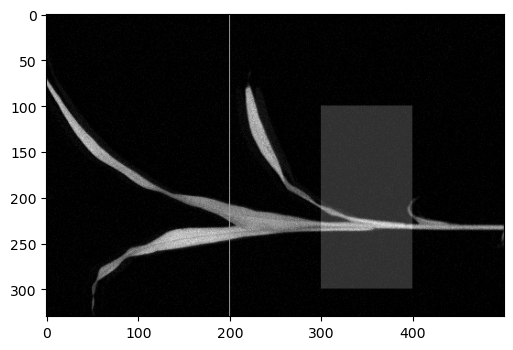

In [18]:
# Add a constant value to a part of the image
gray_img_crop[100:300,300:400] = gray_img_crop[100:300,300:400] + 1500
pcv.plot_image(gray_img_crop)

# Histogram
Histograms show how the pixels in an image are distributed across the range of values

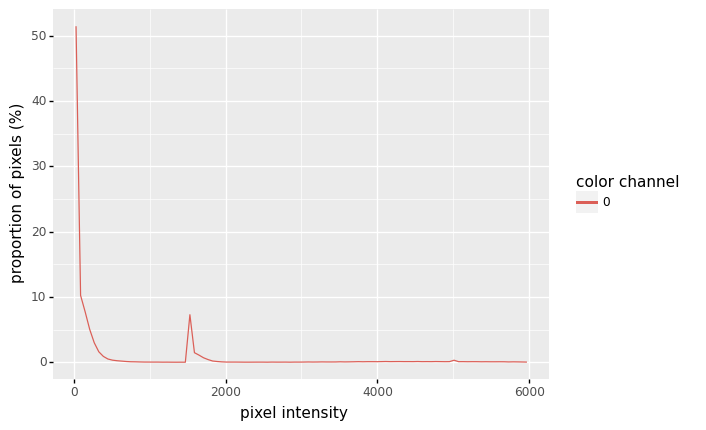

In [20]:
# Plot a histogram of the pixel intensity values
hist = pcv.visualize.histogram(img=gray_img_crop, bins=100, lower_bound=0, upper_bound=6000)

# RGB images
In color images each pixel is given by its two coordinates and three intensity values

Color images are encoded using a Red Green Blue (RGB) color model.
Note that in OpenCV the color order is BGR

![3D gird](./figures/grid3D.png)

The color channels are stacked in a third dimension and increase from the 'front' to the 'back'

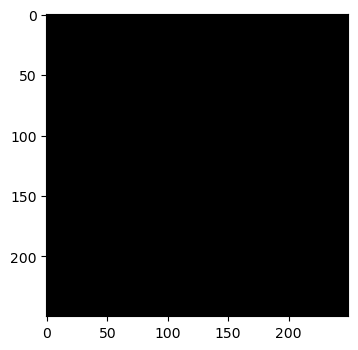

In [21]:
# Create a constant color image:
# Initialization with all values to zero
my_rgb_img = np.zeros((250,250,3), dtype=np.uint8)
pcv.plot_image(my_rgb_img)

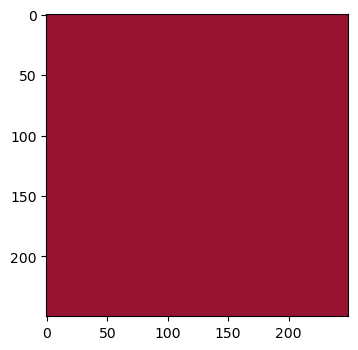

In [22]:
# Create a color image:
# Give a value to each color channel
my_rgb_img[:,:,0] = 50
my_rgb_img[:,:,1] = 20
my_rgb_img[:,:,2] = 150
pcv.plot_image(my_rgb_img)

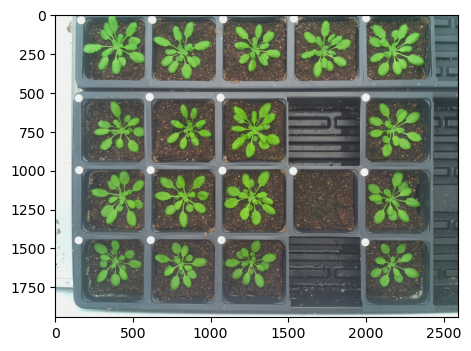

In [23]:
# Read a color image into the program
rgb_img, filepath, filename = pcv.readimage(filename="images/2017-02-28_1500_ch129-pos01.jpg")

In [24]:
# Determine the shape and size of the image
rgb_img.shape

(1944, 2592, 3)

In [25]:
# Determine the data type of the image
rgb_img.dtype

dtype('uint8')

In [26]:
# Calculate the minimum value observed in rgb_img
np.min(rgb_img)

0

In [27]:
# Calculate the maximum value observed in rgb_img
np.max(rgb_img)

255

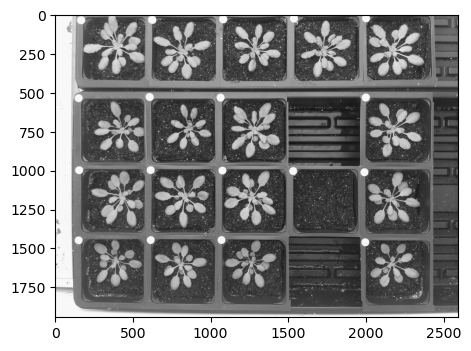

In [28]:
# Subset the green color channel
pcv.plot_image(img=rgb_img[:,:,1])

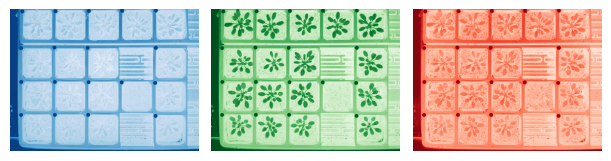

In [29]:
# Plot all three color channels
plot_color_channels(rgb_img)

In [30]:
# Calculate the min, max, and mean values in the green color channel
print(np.min(rgb_img[:,:,1]))
print(np.max(rgb_img[:,:,1]))
print(np.mean(rgb_img[:,:,1]))

23
249
115.06623458377788


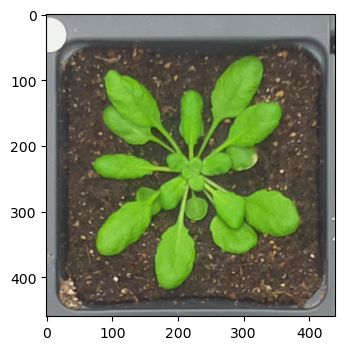

In [31]:
# crop the rgb_img to obtain a single plant
img = rgb_img[500:960, 1060:1500]
pcv.plot_image(img)

In [32]:
# Print dimensions of subset image
np.shape(img)

(460, 440, 3)

# Other color spaces
Images can be represented in other color spaces or conventions. They also consist of different channels that can be observed as grayscale 

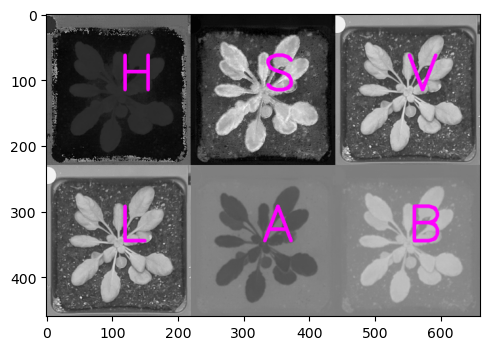

In [33]:
# Visualize colorspaces
cs_plot = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

# Conversion from RGB to grayscale

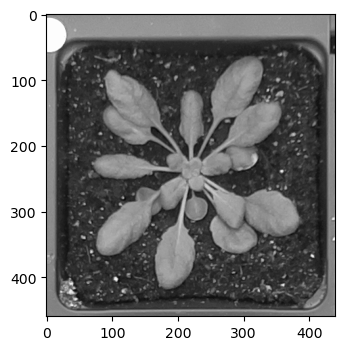

In [34]:
# Convert img to grayscale using the formula: gray = 0.3R + 0.59G + 0.11B
my_gray_img = 0.3*img[:,:,2] + 0.59*img[:,:,1] + 0.11*img[:,:,0]
pcv.plot_image(my_gray_img)

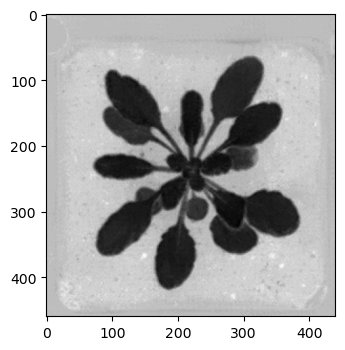

In [35]:
# Convert RGB image to a channel in the lab space 
a_img = pcv.rgb2gray_lab(rgb_img=img, channel="a")

# How do we label which pixels are plant (or background)?

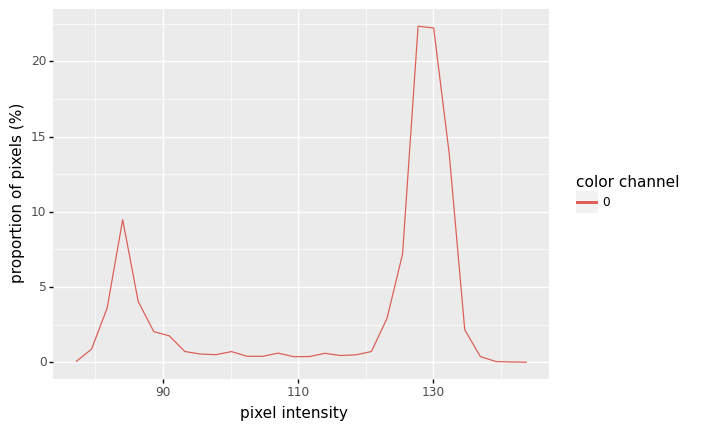

In [36]:
# Plot a histogram of the pixel intensity values
hist = pcv.visualize.histogram(img=a_img, bins = 30)

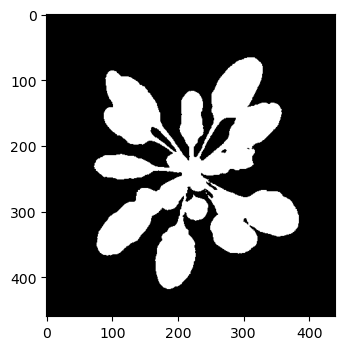

In [37]:
# Threshold the grayscale image
bin_img = pcv.threshold.binary(gray_img=a_img, threshold=100, max_value=255, object_type="dark")

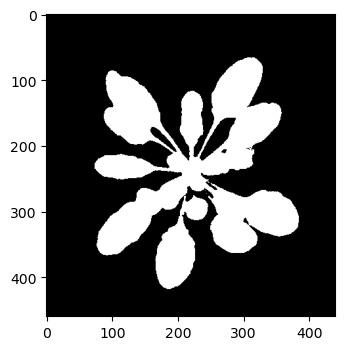

In [38]:
# Threshold using the < operator
my_mask = a_img < 100
pcv.plot_image(my_mask)

In [39]:
# Show the values of the mask
my_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

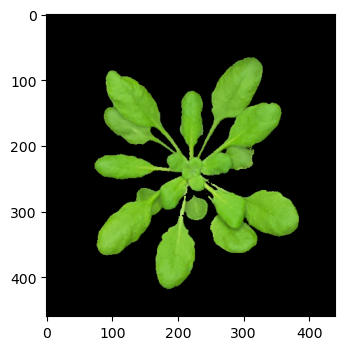

In [40]:
# Use the True/False result to mask the backround 
img_masked = img.copy()
img_masked[:,:,0] = img[:,:,0] * my_mask
img_masked[:,:,1] = img[:,:,1] * my_mask
img_masked[:,:,2] = img[:,:,2] * my_mask
pcv.plot_image(img_masked)

In [41]:
# Calculate the area of the plant in pixels
my_mask_ones = my_mask*1
np.sum(my_mask_ones)

48384

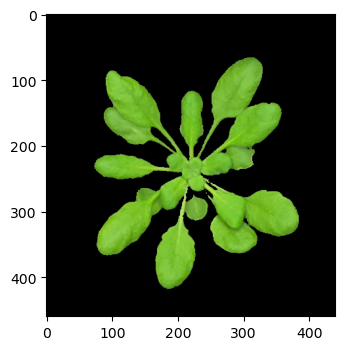

In [42]:
# masking using pcv.apply_mask
image_masked2 = pcv.apply_mask(img=img, mask=bin_img, mask_color='black')

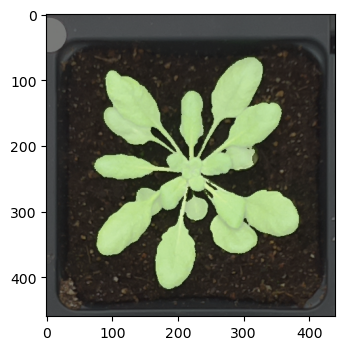

In [43]:
# Create an image that overlays the mask and the rgb image
overlay = pcv.visualize.overlay_two_imgs(img1=img, img2=bin_img)

In [44]:
# Save an image to a file
pcv.print_image(overlay, 'overlay_img.png')

# The binary image is a labeled image
In the binary image, the foreground is labeled "white" with the pixel value 255, and the background is labeled "black" with the pixel value 0

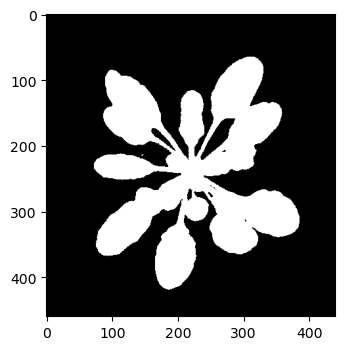

In [45]:
# Try an auto-threshold method
bin_img = pcv.threshold.otsu(gray_img=a_img,max_value=255, object_type="dark")

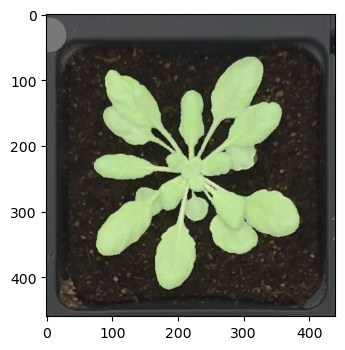

In [46]:
# Overlay the mask over the RGB image
overlay = pcv.visualize.overlay_two_imgs(img1=img, img2=bin_img)

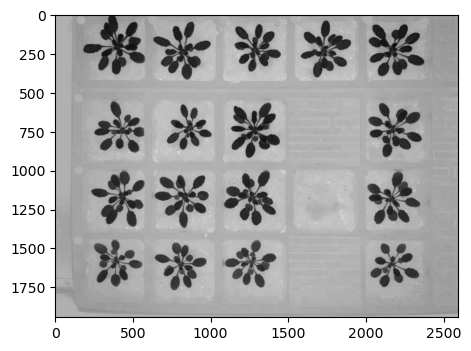

In [47]:
# Convert RGB image to grayscale
a_img = pcv.rgb2gray_lab(rgb_img=rgb_img, channel="a")

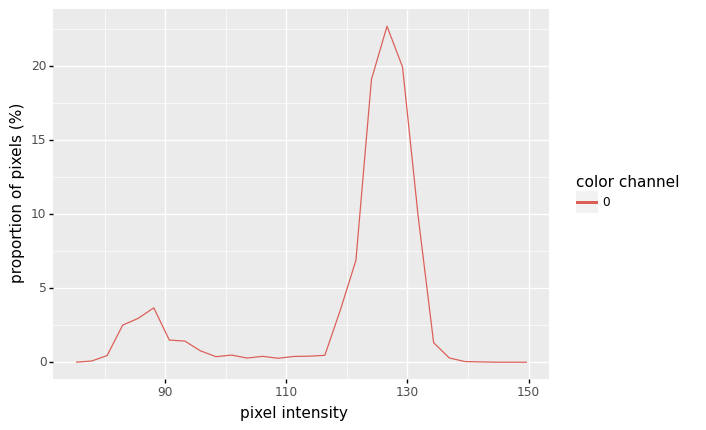

In [48]:
# Plot a histogram of the pixel intensity values
hist = pcv.visualize.histogram(img=a_img, bins=30)

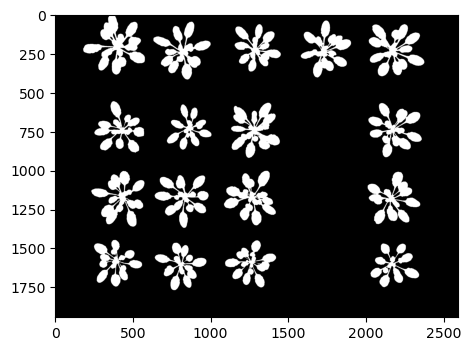

In [49]:
# Try an auto-threshold method
bin_img = pcv.threshold.otsu(gray_img=a_img,max_value=255, object_type="dark")

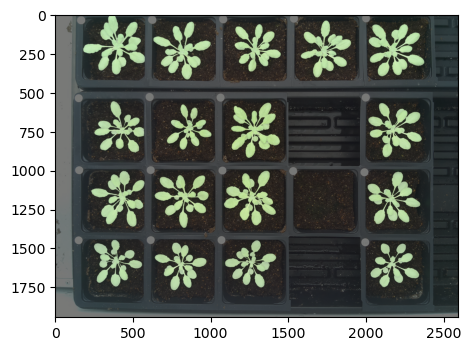

In [50]:
# Overlay the mask over the RGB image
overlay = pcv.visualize.overlay_two_imgs(img1=rgb_img, img2=bin_img)

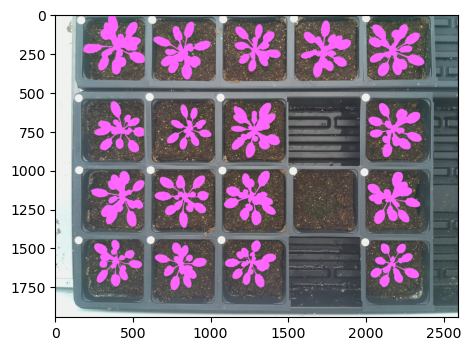

In [51]:
# Convert binary mask to contours (connected components)
cnt, cnt_str = pcv.find_objects(img=rgb_img, mask=bin_img)

# We have contours for individual plants, how do we measure them individually?

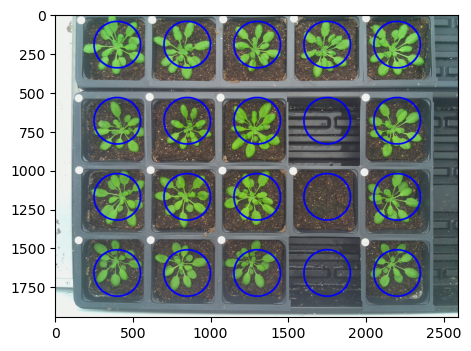

In [52]:
# Create a region of interest (ROI) for each pot 
rois, rois_str = pcv.roi.multi(img=rgb_img, coord=(400, 190), radius=150, spacing=(450, 490), nrows=4, ncols=5)

In [53]:
# Create a list of plant IDs
plant_ids = range(0, len(rois))

In [54]:
# Select one plant
i = 0
roi = rois[i]
roi_str = rois_str[i]
plant_id = plant_ids[i]

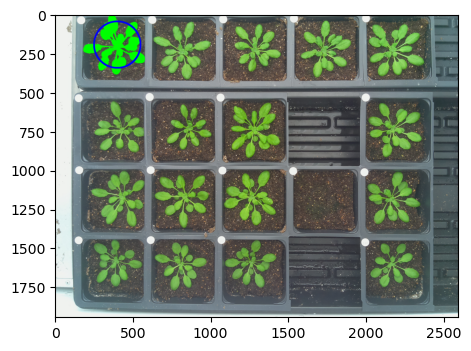

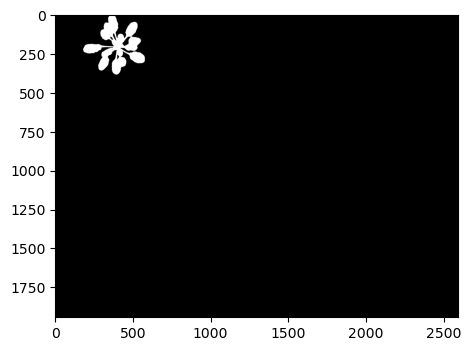

In [55]:
# Filter contours associated with one plant
plant_cnt, plant_str, plant_mask, plant_area = pcv.roi_objects(img=rgb_img, roi_contour=roi, roi_hierarchy=roi_str, object_contour=cnt, obj_hierarchy=cnt_str)

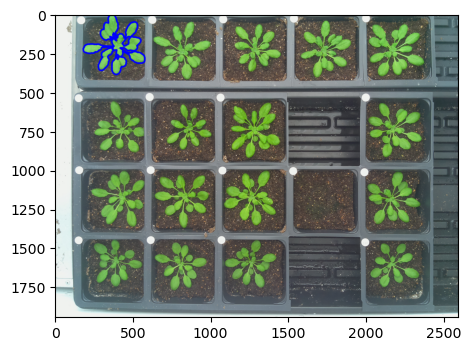

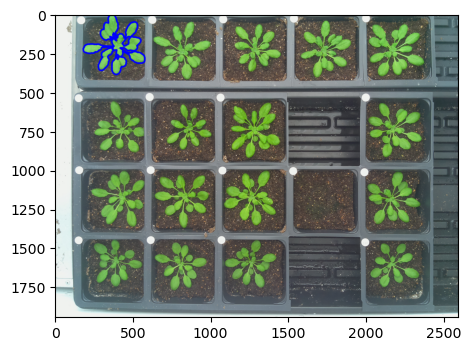

In [56]:
# Combine contours into one object
plant, plant_mask = pcv.object_composition(img=rgb_img, contours=plant_cnt, hierarchy=plant_str)

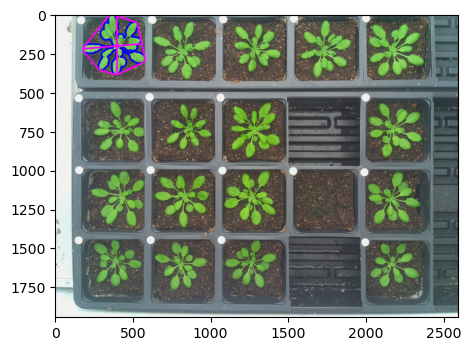

In [57]:
# Measure the plant object
shape_img = pcv.analyze_object(img=rgb_img, obj=plant, mask=plant_mask, label=plant_id)

In [58]:
# Print measurements
pcv.outputs.observations

{0: {'in_bounds': {'trait': 'whether the plant goes out of bounds ',
   'method': 'plantcv.plantcv.within_frame',
   'scale': 'none',
   'datatype': "<class 'bool'>",
   'value': False,
   'label': 'none'},
  'area': {'trait': 'area',
   'method': 'plantcv.plantcv.analyze_object',
   'scale': 'pixels',
   'datatype': "<class 'int'>",
   'value': 59336.0,
   'label': 'pixels'},
  'convex_hull_area': {'trait': 'convex hull area',
   'method': 'plantcv.plantcv.analyze_object',
   'scale': 'pixels',
   'datatype': "<class 'int'>",
   'value': 104060.5,
   'label': 'pixels'},
  'solidity': {'trait': 'solidity',
   'method': 'plantcv.plantcv.analyze_object',
   'scale': 'none',
   'datatype': "<class 'float'>",
   'value': 0.5702067547244152,
   'label': 'none'},
  'perimeter': {'trait': 'perimeter',
   'method': 'plantcv.plantcv.analyze_object',
   'scale': 'pixels',
   'datatype': "<class 'int'>",
   'value': 2911.0175800323486,
   'label': 'pixels'},
  'width': {'trait': 'width',
   'meth

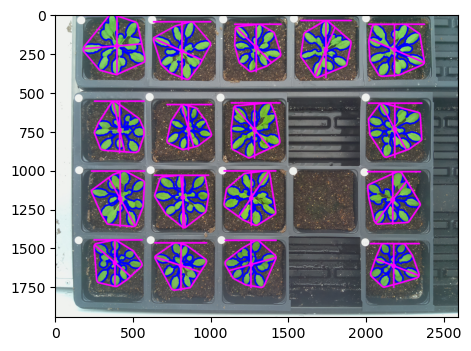

In [59]:
# Loop over all plants
shape_img = np.copy(rgb_img)
pcv.params.debug = None

for i in range(0, len(rois)):
    # Select the ith plant
    roi = rois[i]
    roi_str = rois_str[i]
    plant_id = plant_ids[i]
    # Filter contours associated with one plant
    plant_cnt, plant_str, plant_mask, plant_area = pcv.roi_objects(img=rgb_img, roi_contour=roi, roi_hierarchy=roi_str, object_contour=cnt, obj_hierarchy=cnt_str)
    if plant_area > 0:
        # Combine contours into one object
        plant, plant_mask = pcv.object_composition(img=rgb_img, contours=plant_cnt, hierarchy=plant_str)
        # Measure the plant object
        shape_img = pcv.analyze_object(img=shape_img, obj=plant, mask=plant_mask, label=plant_id)
pcv.plot_image(shape_img)

In [60]:
# Print the rosette area of each plant
for i in plant_ids:
    measurements = pcv.outputs.observations.get(i)
    if measurements:
        area = pcv.outputs.observations[i]['area']['value']
    else:
        area = 0
    print(f"Plant {i}: {area}")

Plant 0: 59336.0
Plant 1: 48655.0
Plant 2: 39300.0
Plant 3: 45959.0
Plant 4: 56500.0
Plant 5: 40131.0
Plant 6: 29648.0
Plant 7: 51785.0
Plant 8: 0
Plant 9: 47935.0
Plant 10: 48648.0
Plant 11: 45623.0
Plant 12: 48334.0
Plant 13: 0
Plant 14: 45493.0
Plant 15: 36041.0
Plant 16: 36473.0
Plant 17: 36263.0
Plant 18: 0
Plant 19: 33847.0
